Ranked features for Principal Component 1:
Total_Market_Value      0.435453
Points                  0.434265
Goal_Difference         0.431419
Average_Market_Value    0.416601
Position                0.384265
Average_Age             0.242090
Number_of_Foreigners    0.182580
Squad_Size              0.150048
Name: 0, dtype: float64

Ranked features for Principal Component 2:
Squad_Size              0.637059
Number_of_Foreigners    0.567527
Average_Age             0.397743
Average_Market_Value    0.224300
Position                0.175366
Points                  0.120347
Goal_Difference         0.105859
Total_Market_Value      0.084361
Name: 1, dtype: float64


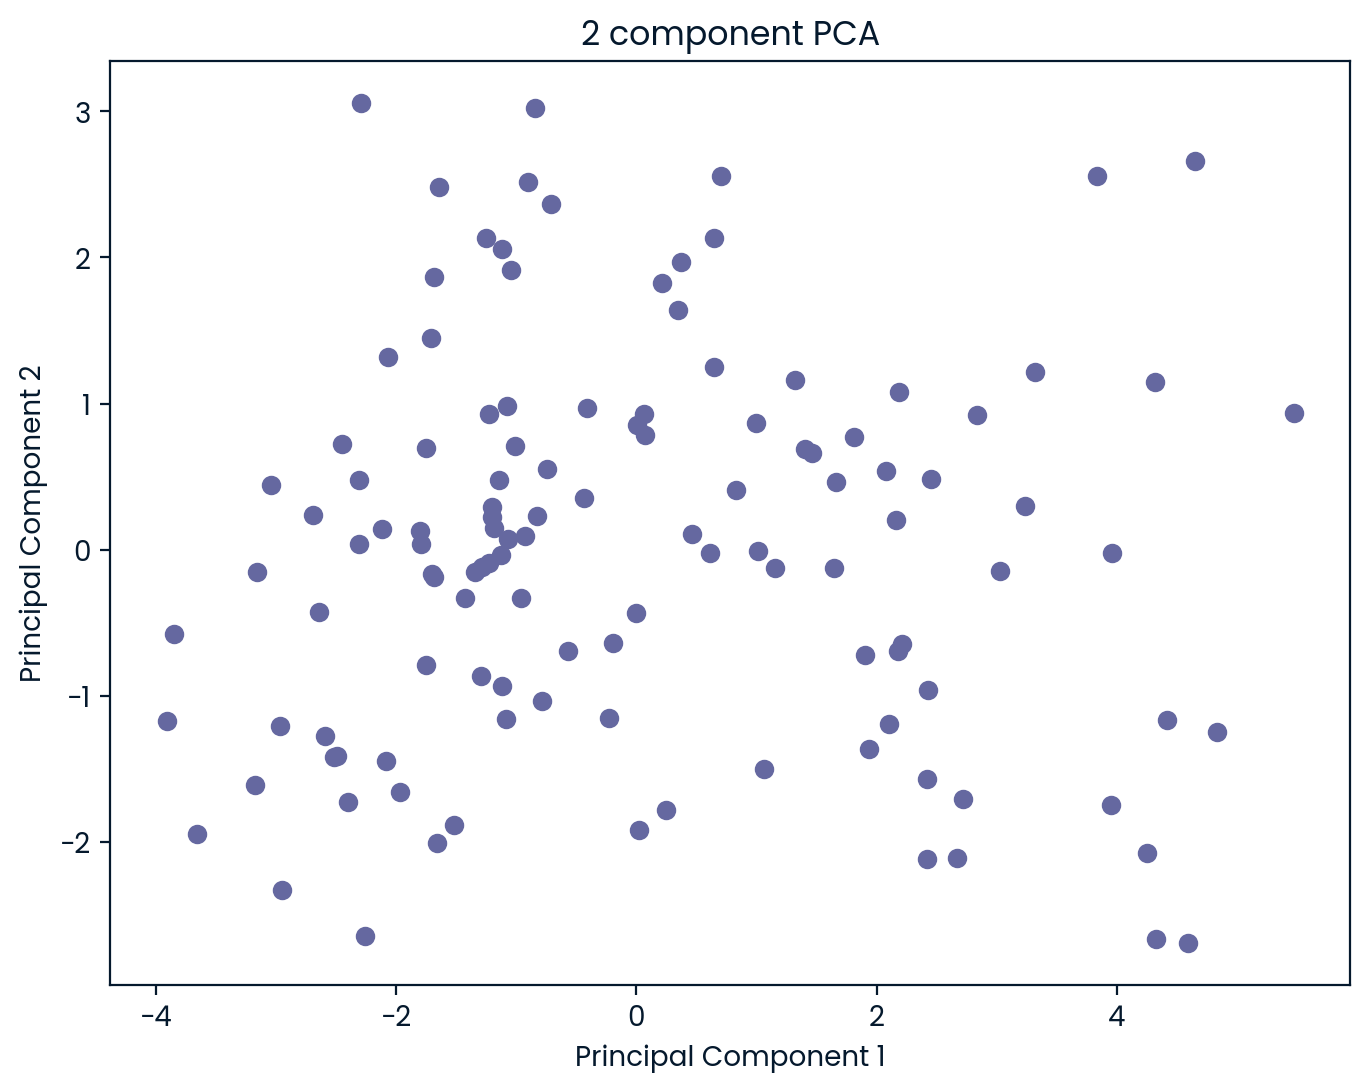

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('BigPositionVsValue.csv')

# Assuming the dataset has features and we exclude non-numeric or identifier columns like 'Year' and 'Team'
features = ['Position', 'Goal_Difference', 'Points', 'Squad_Size', 'Average_Age', 'Number_of_Foreigners', 'Average_Market_Value', 'Total_Market_Value']

# Separating out the features
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Performing PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Creating a DataFrame with the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

absolute_loadings = np.abs(pca.components_)

# Create a DataFrame to store the loadings
loadings_df = pd.DataFrame(absolute_loadings, columns=features)

# Rank the features based on their importance for each principal component
ranked_features_pc1 = loadings_df.loc[0].sort_values(ascending=False)
ranked_features_pc2 = loadings_df.loc[1].sort_values(ascending=False)

print("Ranked features for Principal Component 1:")
print(ranked_features_pc1)
print("\nRanked features for Principal Component 2:")
print(ranked_features_pc2)

# Visualizing the PCA
plt.figure(figsize=(8,6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.show()